# Лабораторная работа 3.

# Деревья решений. Ансамбли решающих деревьев.

# Теоретическая справка

1. Решающие деревья

Решающее дерево — это инструмент поддержки принятия решений, который использует древовидную модель возможных решений и их возможных последствий. В машинном обучении это наглядная и интерпретируемая модель классификации и регрессии. Построение решающего дерева включает в себя процесс разделения данных на подмножества на основе атрибутов таким образом, чтобы построенная модель легко классифицировала данные. Визуализация дерева помогает понять, как модель принимает решения, и представляет правила классификации в интерпретируемой форме.

2. Градиентный бустинг

Градиентный бустинг — это техника машинного обучения для задач регрессии и классификации, которая создает предсказательную модель в форме ансамбля слабых предсказательных моделей, обычно деревьев решений. Он строит модель поэтапно, как и другие бустинговые методы, и оптимизирует произвольную дифференцируемую функцию потерь. Оценка значимости переменных в контексте градиентного бустинга помогает понять, какие признаки наиболее влияют на предсказание.

3. Зависимость качества решения от числа вершин дерева

Число вершин дерева влияет на сложность модели. Большее количество вершин может привести к более сложной модели, которая лучше адаптируется к обучающим данным, но также может вызвать переобучение и ухудшить обобщающую способность модели. В лабораторной работе исследуется, как меняется точность модели с изменением числа вершин.

4. Зависимость качества от числа деревьев в градиентном бустинге

Количество деревьев в градиентном бустинге определяет размер ансамбля. Исследование этой зависимости позволяет найти баланс между производительностью и скоростью модели. Оптимальное количество деревьев должно минимизировать ошибку на скользящем контроле, не вызывая переобучения.

5. Оптимизация случайного леса

Случайный лес — это ансамблевый метод, который работает путем создания множества решающих деревьев на подвыборках набора данных и усреднения их для улучшения точности и контроля переобучения. Точно так же, как и для градиентного бустинга, для случайного леса можно исследовать зависимость качества от числа деревьев и их глубины, чтобы найти оптимальные параметры.

### Данные

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

## 1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

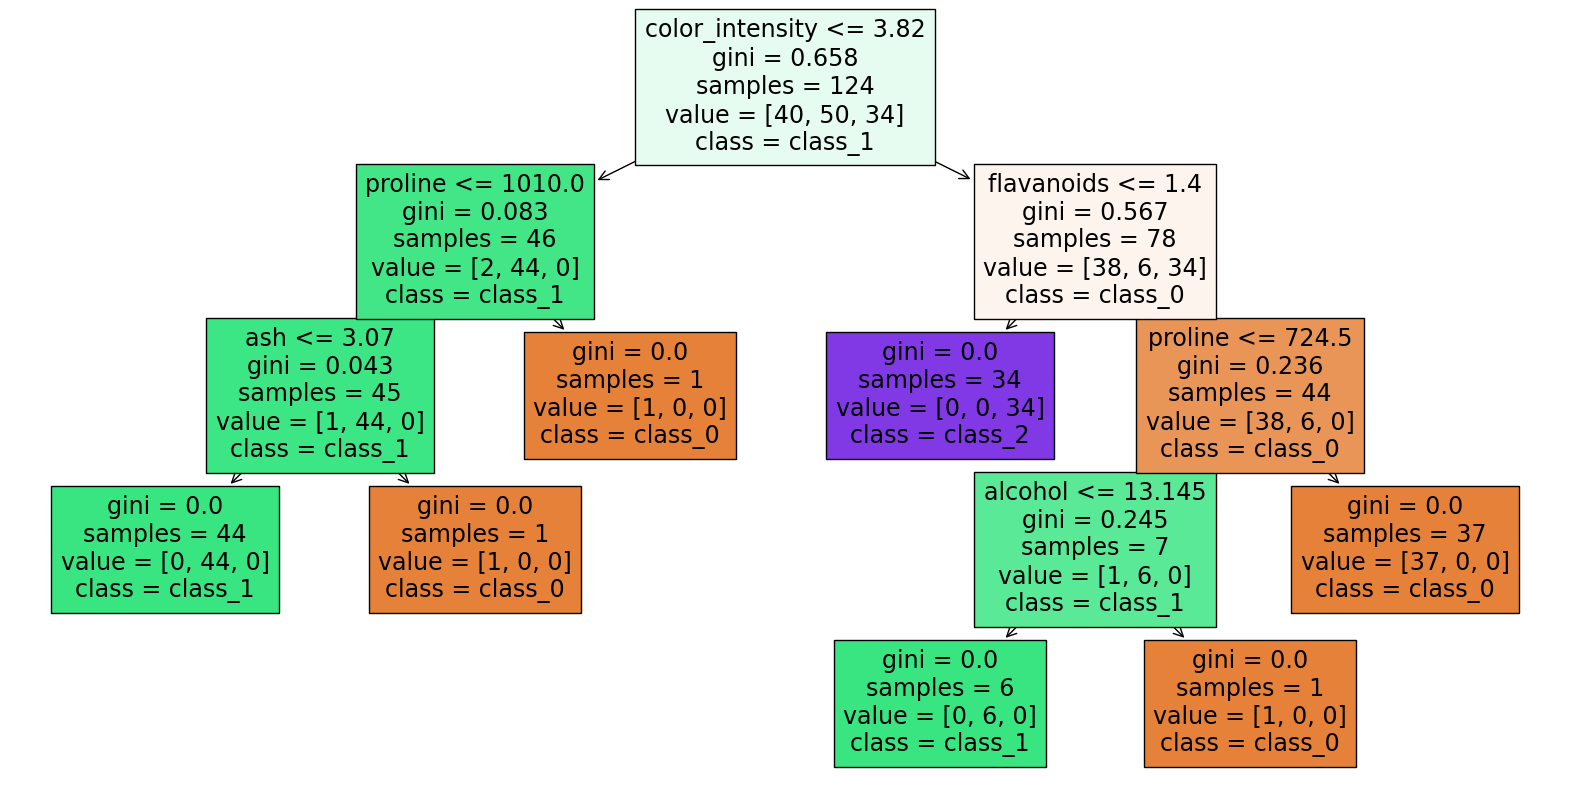

In [4]:
# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создаем экземпляр DecisionTreeClassifier и обучаем его
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Визуализируем дерево решений
plt.figure(figsize=(20,10))
plot_tree(tree_classifier, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()

## 2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

In [5]:
# Создание экземпляра GradientBoostingClassifier
grbc = GradientBoostingClassifier(n_estimators=100,random_state=42)
grbc.fit(X_train, y_train)

# Возьмем n=3 для визуализации
n = 3

feature_importances = grbc.feature_importances_
# Вывод значимости переменных
print("Значимость переменных:")
for feature, importance in zip(wine.feature_names, feature_importances):
    print(f"{feature}: {importance}")

# Для вывода списка построенных деревьев в градиентном бустинге
# Выведем первые 3 дерева массива деревье. (Мы указали n_estimators=100>n, где n=3)
# Мы можем использовать атрибут estimators_
print("Список построенных деревьев:")
trees = grbc.estimators_.flatten()  # estimators_ хранит массив массивов (один массив для каждого класса)
for i in range(n):
    print(trees[i])

Значимость переменных:
alcohol: 0.004551195219494521
malic_acid: 0.005281494881383222
ash: 0.0116098156179409
alcalinity_of_ash: 0.003569967355906581
magnesium: 0.015932876862778386
total_phenols: 6.993549094995912e-06
flavanoids: 0.09696921232229697
nonflavanoid_phenols: 5.075087285573451e-06
proanthocyanins: 0.005516513780190367
color_intensity: 0.28549316066518937
hue: 0.029336088057574376
od280/od315_of_diluted_wines: 0.2574663679517205
proline: 0.28426123864914415
Список построенных деревьев:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x7F28C28CCE40)
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x7F28C28CCE40)
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x7F28C28CCE40)


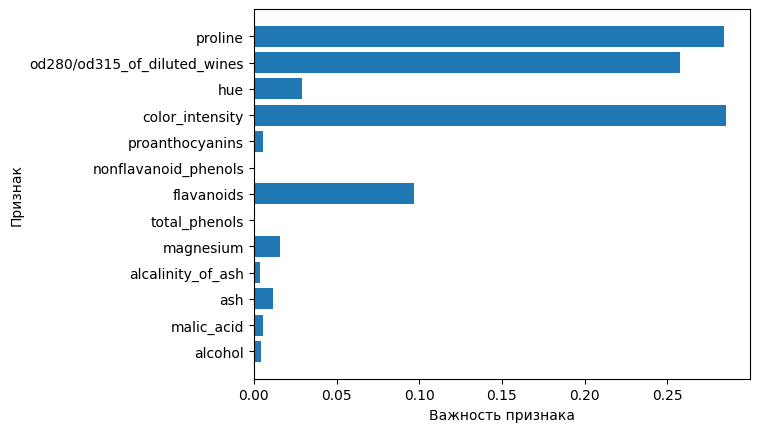

In [6]:
def plot_feature_importances_cancer(model):
    n_features = wine.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), wine.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

plot_feature_importances_cancer(grbc)

### Визуализируем деревья

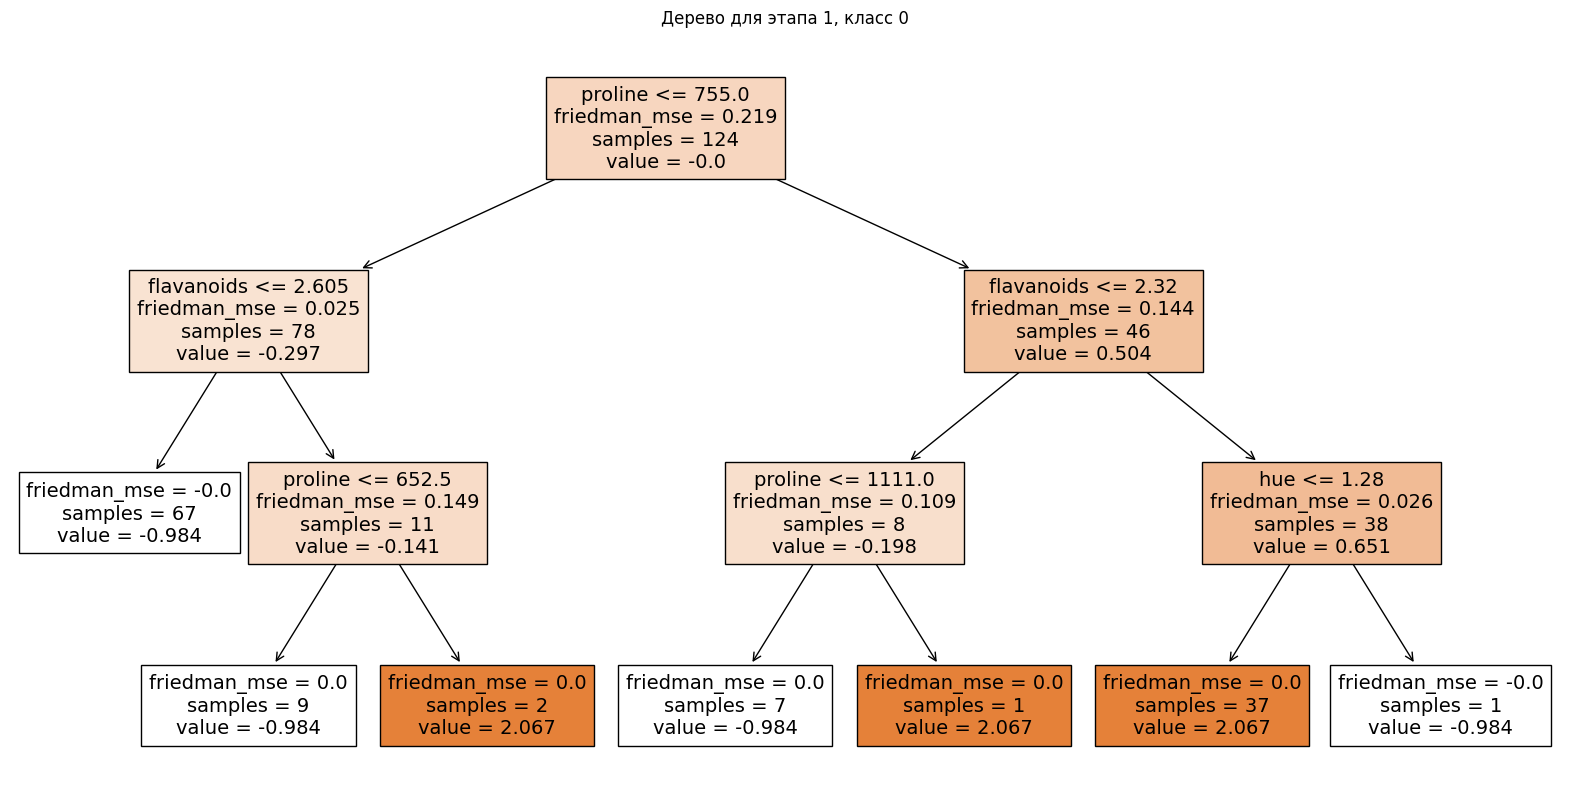

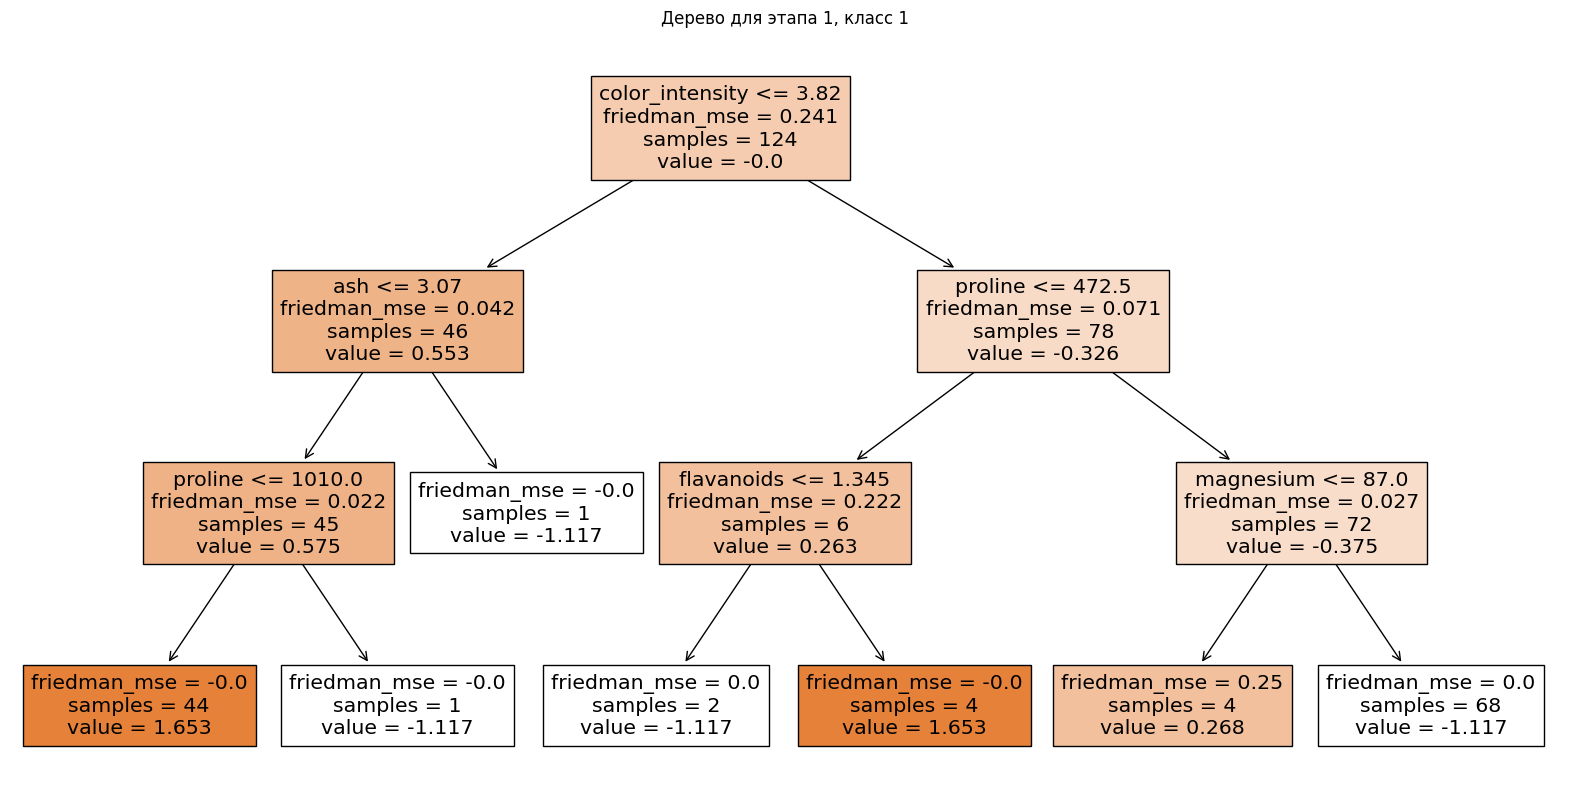

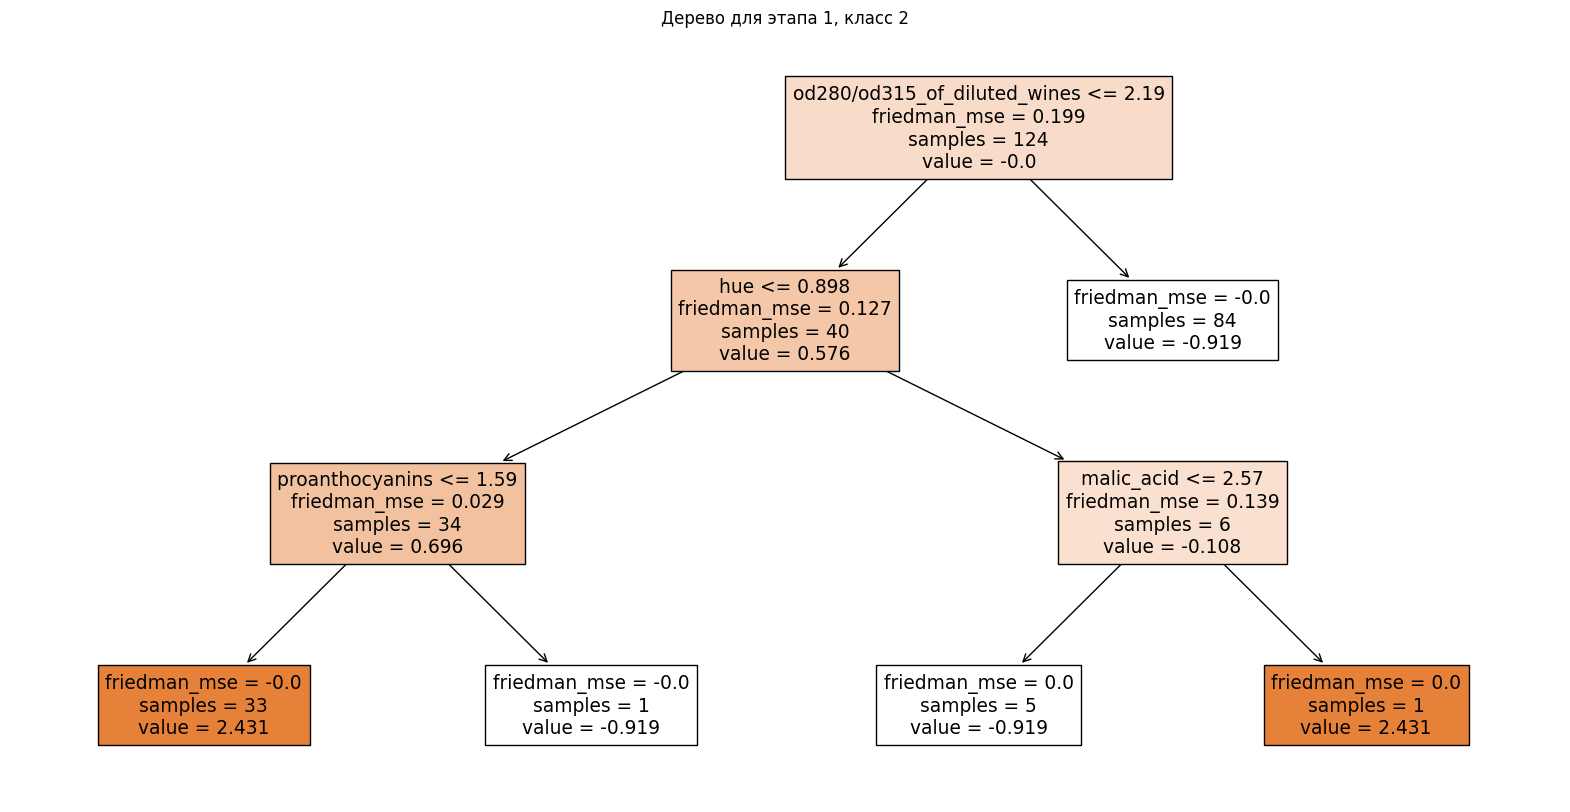

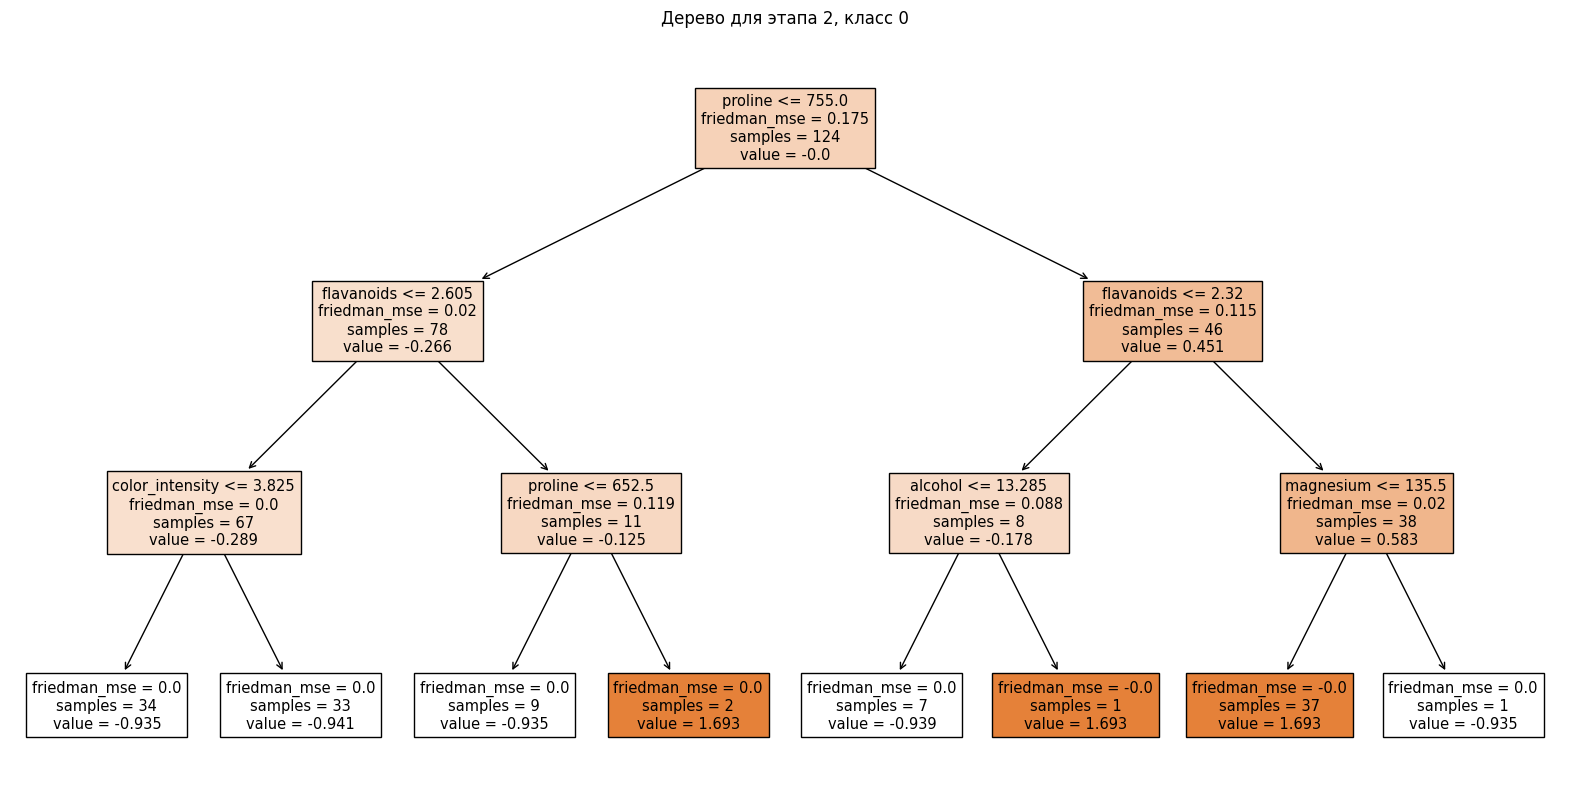

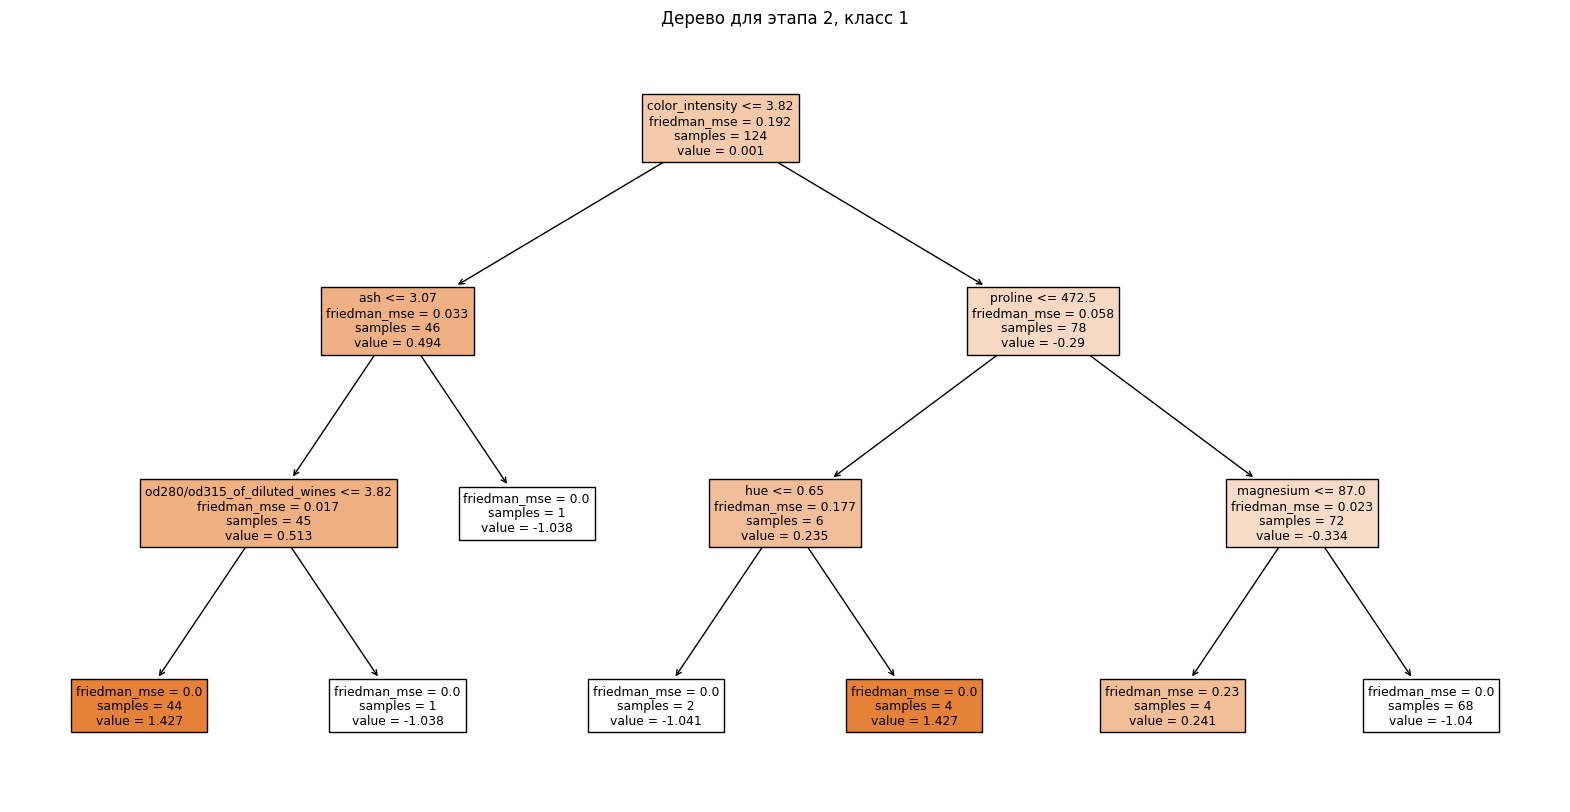

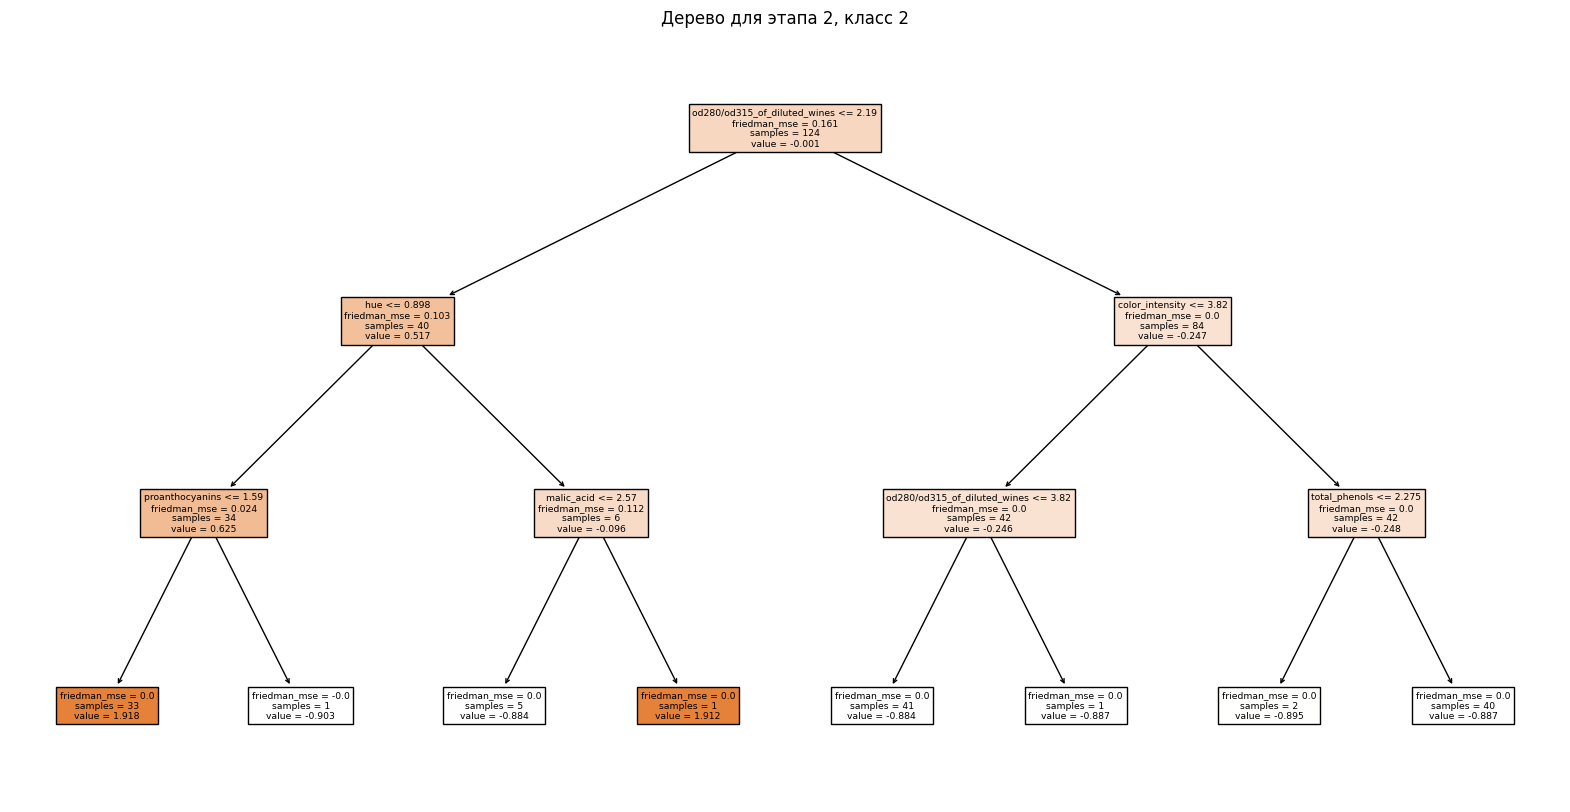

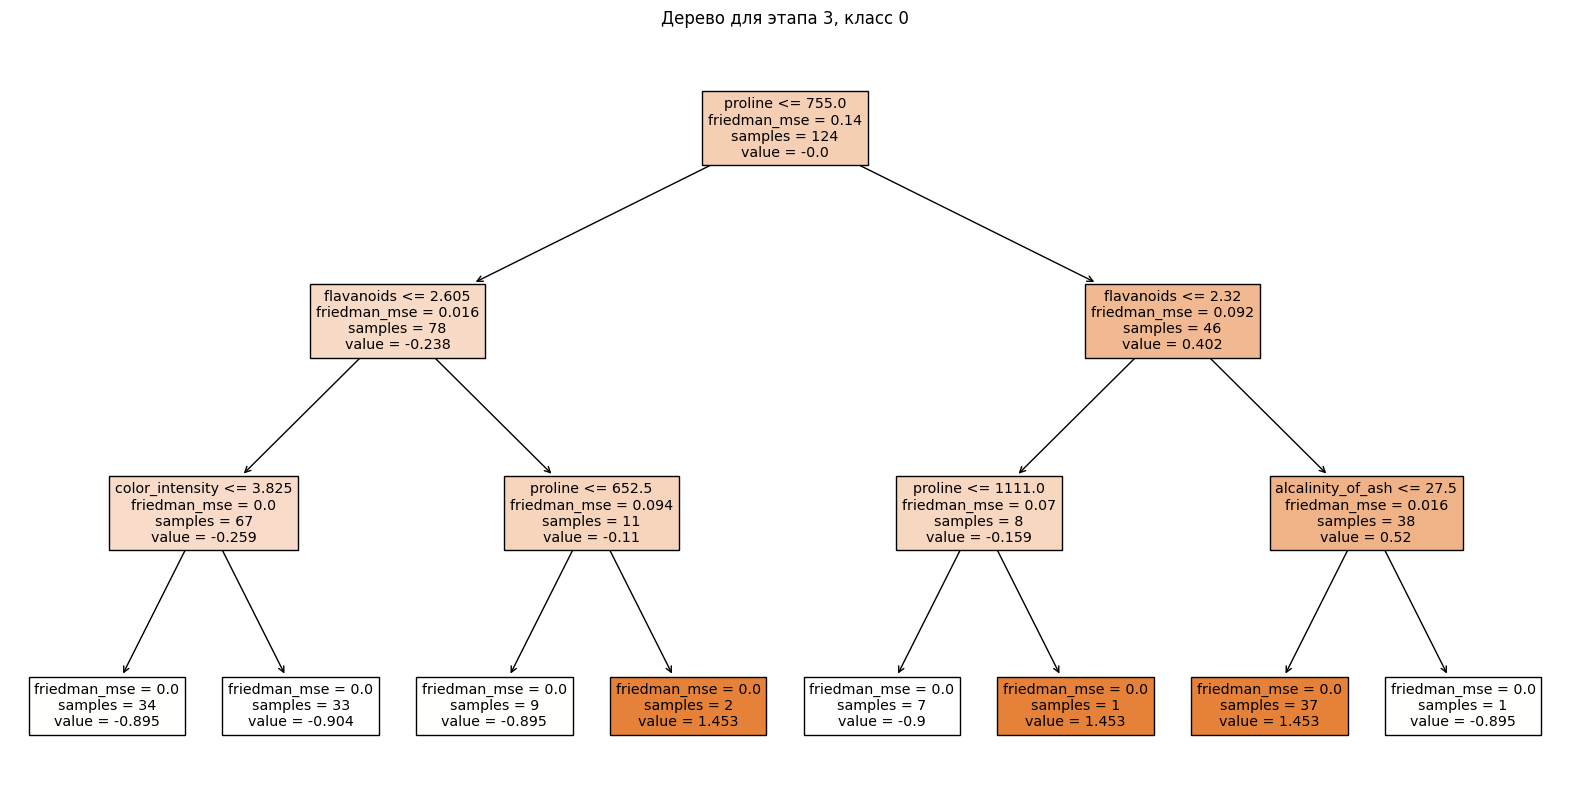

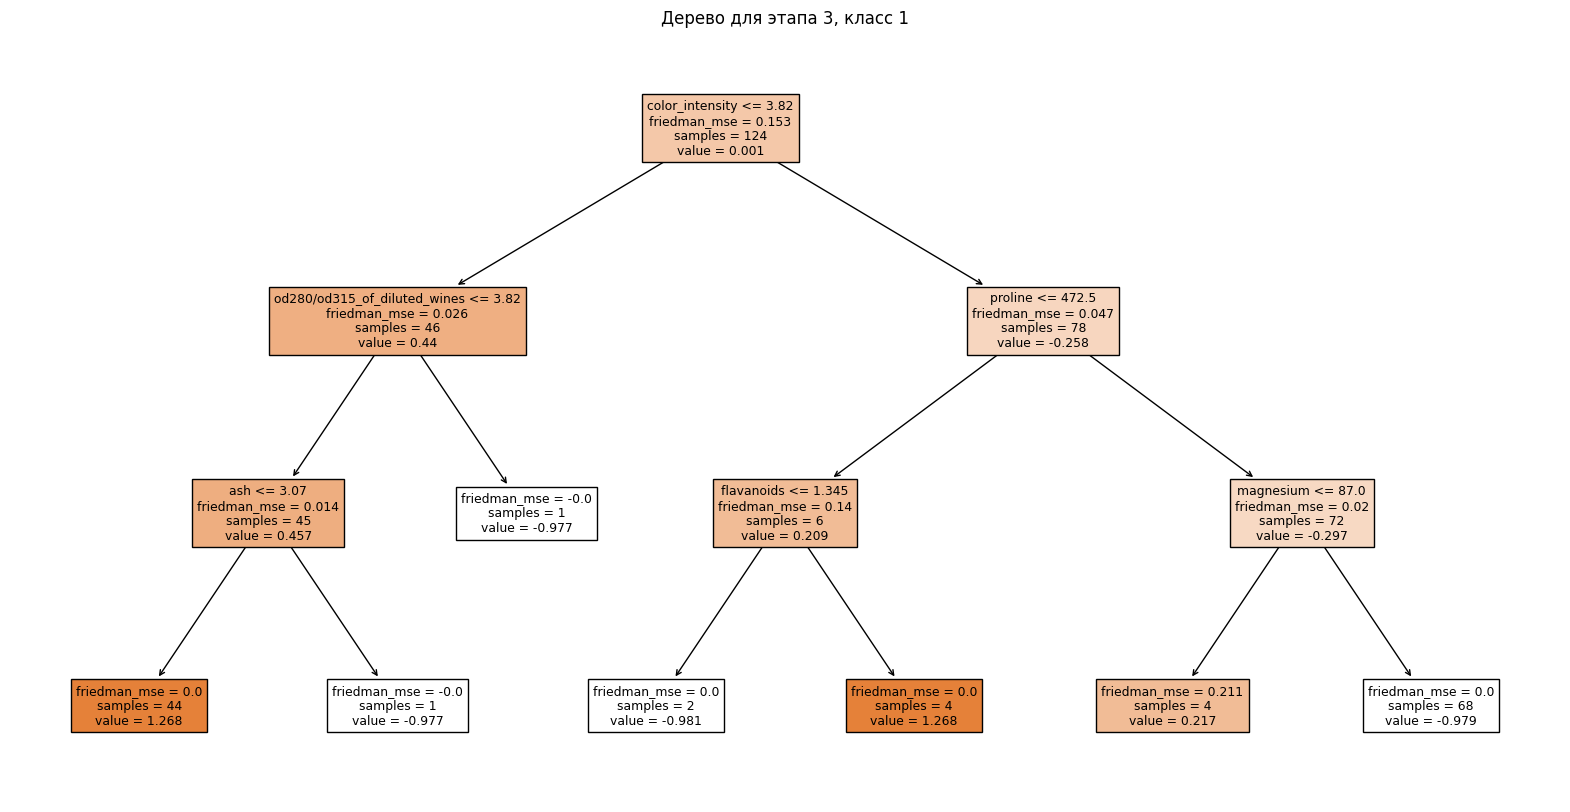

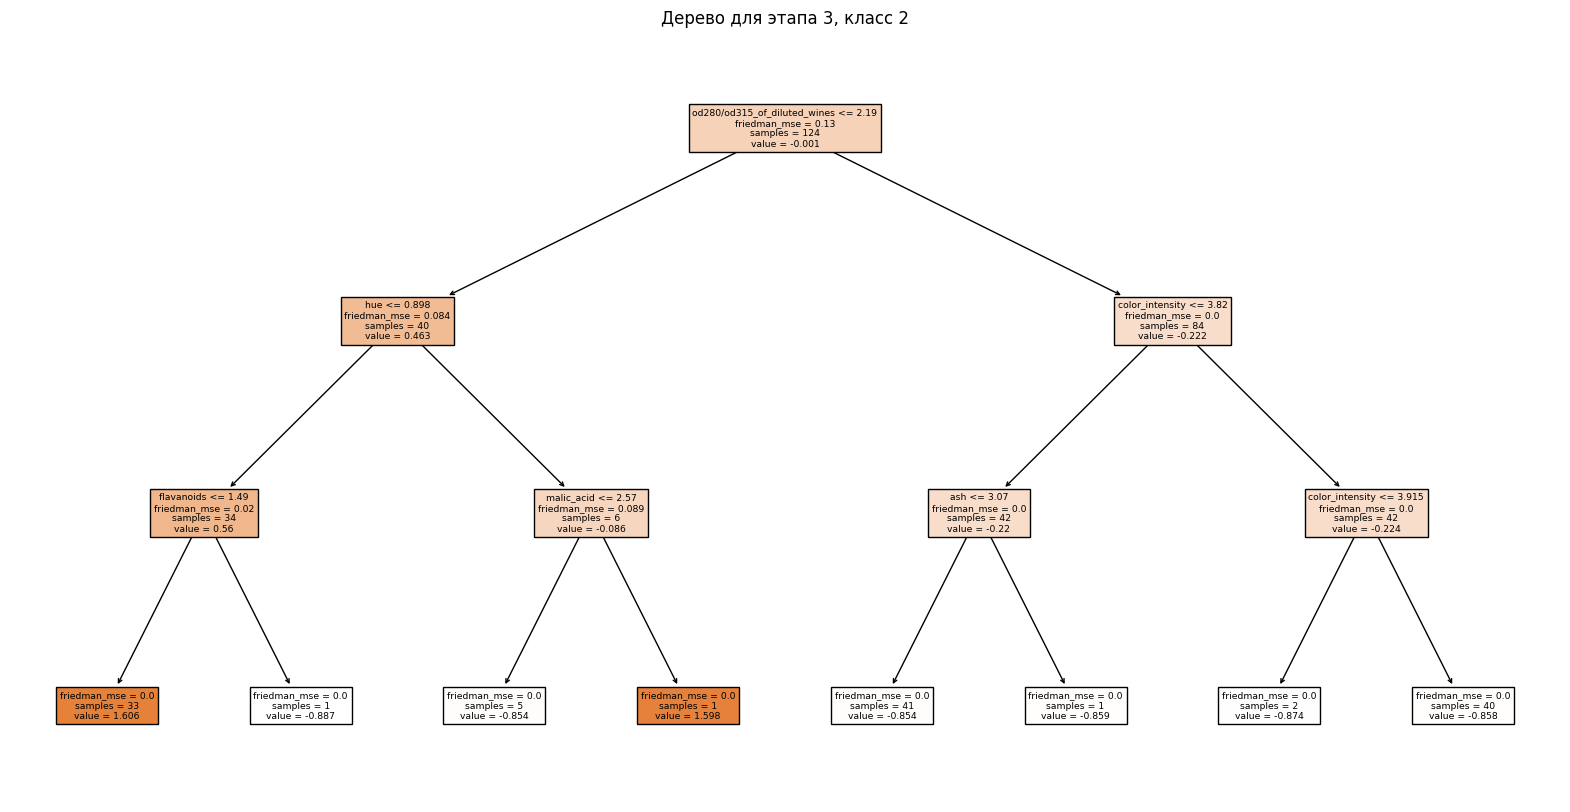

In [7]:
# n_trees = len(grbc.estimators_)

for stage in range(n):  # Перебор этапов бустинга
    for class_idx in range(grbc.n_classes_):  # Перебор классов
        tree = grbc.estimators_[stage, class_idx]
        plt.figure(figsize=(20, 10))
        plot_tree(tree, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
        plt.title(f'Дерево для этапа {stage + 1}, класс {class_idx}')
        plt.show()

## 3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

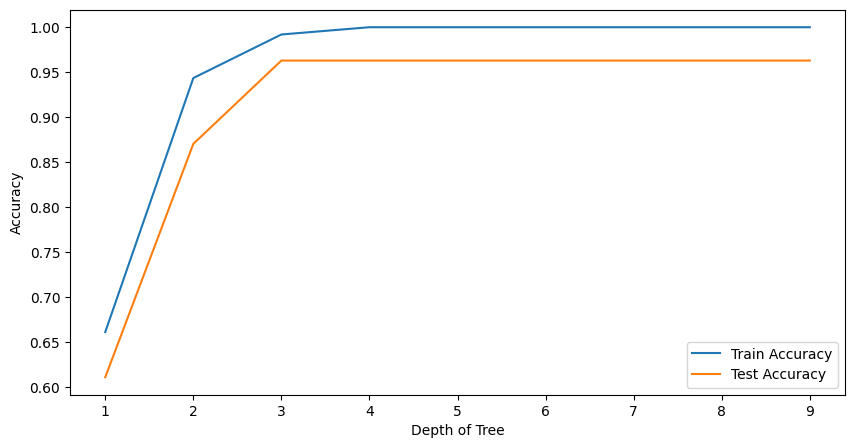

In [21]:
train_scores = []
test_scores = []

# Цикл для обучения моделей с различной глубиной и оценки их точности
for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), train_scores, label='Train Accuracy')
plt.plot(range(1, 10), test_scores, label='Test Accuracy')
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

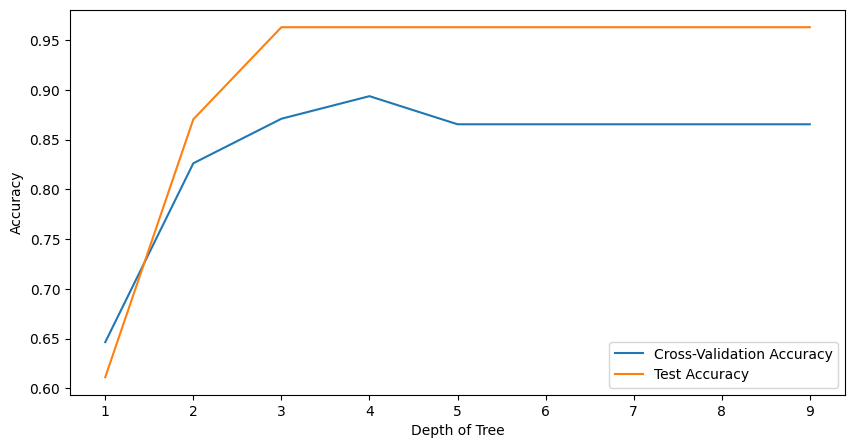

In [35]:
valid_scores = []
test_scores = []

# Цикл для оценки моделей с различной глубиной через кросс-валидацию и на тестовой выборке
for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    # Кросс-валидационная оценка
    # Используем среднее этих оценок (mean()), чтобы получить одно обобщающее значение точности для каждой глубины дерева.
    # Среднее значение используется, чтобы уменьшить влияние случайных колебаний производительности на различных подмножествах данных и получить более стабильную оценку производительности модели.
    valid_scores.append(cross_val_score(model, X, y, cv=5).mean())
    model.fit(X_train, y_train)
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), valid_scores, label='Cross-Validation Accuracy')
plt.plot(range(1, 10), test_scores, label='Test Accuracy')
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.
## Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.


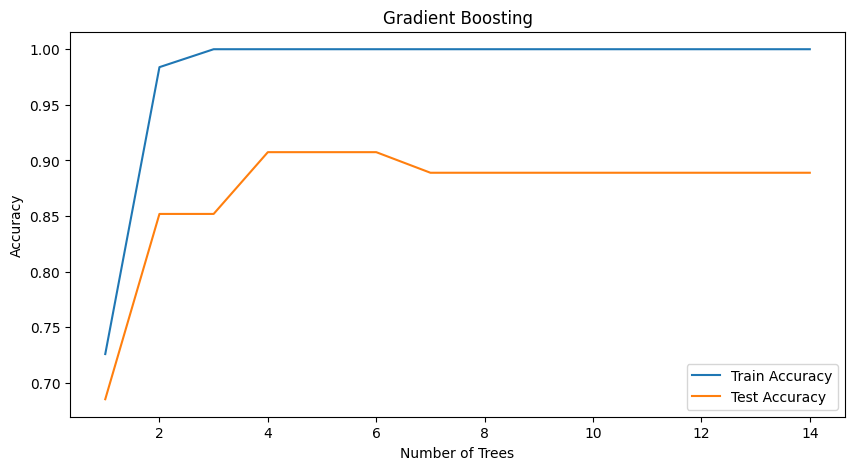

In [32]:
train_boost_scores = []
test_boost_scores = []

# Цикл для обучения Gradient Boosting модели с различным количеством деревьев и оценки точности
for num_trees in range(1, 15):
    boosting = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)
    boosting.fit(X_train, y_train)
    train_boost_scores.append(accuracy_score(y_train, boosting.predict(X_train)))
    test_boost_scores.append(accuracy_score(y_test, boosting.predict(X_test)))

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), train_boost_scores, label='Train Accuracy')
plt.plot(range(1, 15), test_boost_scores, label='Test Accuracy')
plt.title("Gradient Boosting")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

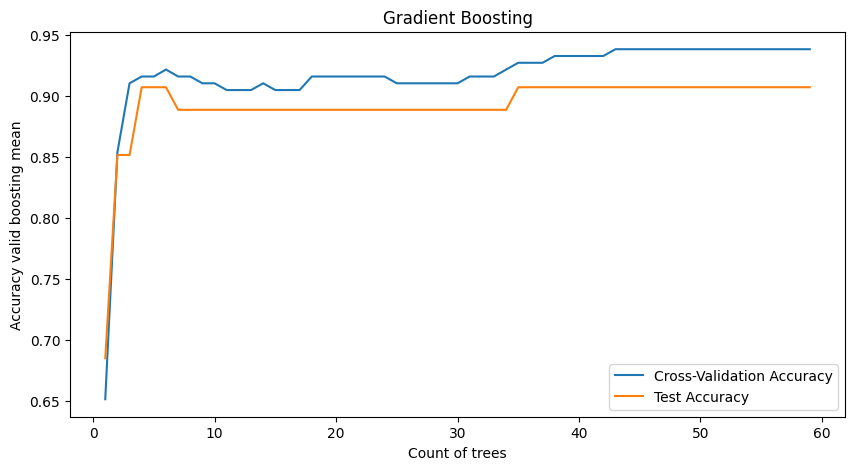

In [38]:
valid_boost_scores = []
test_rand_forest_scores = []
for num_trees in range(1, 60):
    boosting = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)
    valid_boost_scores +=[cross_val_score(boosting, X, y, cv=5).mean()]
    # Оценка модели на тестовой выборке
    boosting.fit(X_train, y_train)
    test_rand_forest_scores.append(accuracy_score(y_test, boosting.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.title("Gradient Boosting")
plt.ylabel("Accuracy valid boosting mean")
plt.xlabel("Count of trees")
plt.plot(range(1, 60), valid_boost_scores, label='Cross-Validation Accuracy');
plt.plot(range(1, 60), test_rand_forest_scores, label='Test Accuracy')
plt.legend()
plt.show()

## 5. Выполнить предыдущий пункт для случайного леса.

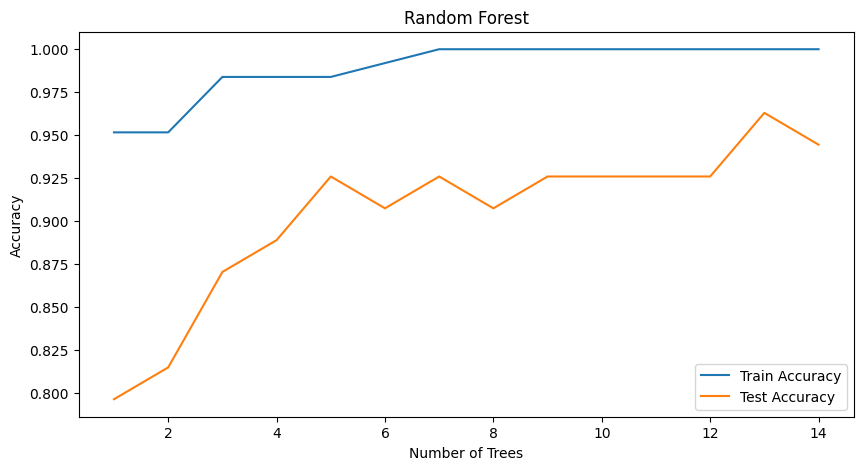

In [29]:
# Переинициализация списков для хранения результатов
rand_forest_scores = []
test_rand_forest_scores = []

# Цикл для обучения модели Random Forest с различным количеством деревьев
for num_trees in range(1, 15):
    rfc = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rfc.fit(X_train, y_train)
    rand_forest_scores.append(accuracy_score(y_train, rfc.predict(X_train)))
    test_rand_forest_scores.append(accuracy_score(y_test, rfc.predict(X_test)))

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), rand_forest_scores, label='Train Accuracy')
plt.plot(range(1, 15), test_rand_forest_scores, label='Test Accuracy')
plt.title("Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

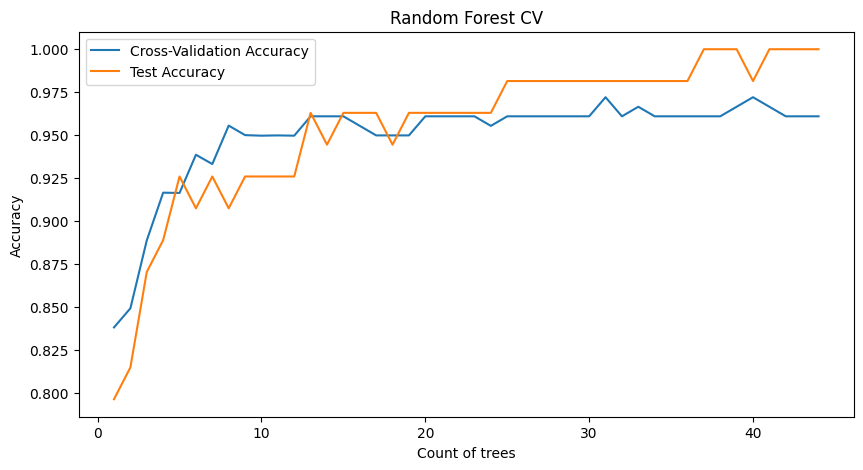

In [39]:
valid_rfc_scores = []
test_rfc_scores = []

for num_trees in range(1, 45):
    rfc = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    valid_rfc_scores += [cross_val_score(rfc, X, y, cv=5).mean()]
    # Оценка модели на тестовой выборке
    rfc.fit(X_train, y_train)
    test_rfc_scores.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.title("Random Forest CV")
plt.ylabel("Accuracy")
plt.xlabel("Count of trees")
plt.plot(range(1, 45), valid_rfc_scores, label='Cross-Validation Accuracy')
plt.plot(range(1, 45), test_rfc_scores, label='Test Accuracy')
plt.legend()
plt.show()